In [1]:
%pwd

u'C:\\pydev\\deep-learning-from-scratch-master\\deep-learning-from-scratch-master\\ch06'

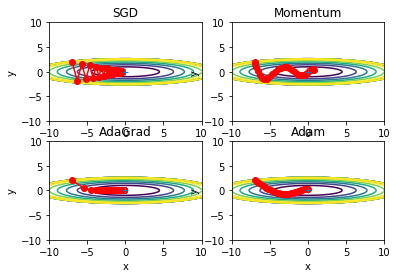

In [2]:
import optimizer_compare_naive

In [6]:
import optimizer_compare_mnist

ImportError: You should use Python 3.x

In [7]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

ImportError: You should use Python 3.x

In [10]:
import numpy as np

In [11]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col

In [17]:
x1=np.random.rand(1,3,7,7)



In [21]:
col1=im2col(x1,5,5, stride=1, pad=0)

In [22]:
print(x1.shape)

print(col1.shape)

(1L, 3L, 7L, 7L)
(9L, 75L)


In [23]:
print(x1[:,:,:5,:5])

[[[[ 0.93136953  0.22504341  0.18758928  0.60796449  0.94811244]
   [ 0.7853881   0.63875416  0.0836281   0.96490763  0.17907073]
   [ 0.93333229  0.58135152  0.24306844  0.31718476  0.35314269]
   [ 0.79315035  0.87479656  0.79482697  0.2925141   0.89954225]
   [ 0.09750466  0.12873281  0.92594746  0.70763627  0.91115069]]

  [[ 0.66043823  0.91376471  0.27529088  0.31750976  0.28851401]
   [ 0.47929556  0.59991034  0.2177825   0.57553395  0.57704167]
   [ 0.72331628  0.39708927  0.86687856  0.47637256  0.91230473]
   [ 0.23076784  0.80813514  0.5462918   0.10141842  0.50164217]
   [ 0.6110272   0.76827848  0.4571286   0.37128352  0.55213605]]

  [[ 0.94777445  0.17000721  0.94606995  0.71989376  0.12981843]
   [ 0.90314233  0.90531596  0.81353833  0.29293936  0.39198703]
   [ 0.66643322  0.75072663  0.76065446  0.98486527  0.37382397]
   [ 0.40878267  0.44629989  0.79071714  0.07880615  0.18377292]
   [ 0.67577094  0.03326384  0.11705641  0.38702267  0.21860542]]]]


In [24]:
x=np.array(np.arange(32))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [27]:
x.reshape((2,-1,8))

array([[[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15]],

       [[16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31]]])

In [28]:
x.reshape(-1,2,2,4)

array([[[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]],


       [[[16, 17, 18, 19],
         [20, 21, 22, 23]],

        [[24, 25, 26, 27],
         [28, 29, 30, 31]]]])

In [29]:
f=np.array(np.arange(27)).reshape(1,3,3,3)

In [30]:
f

array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]]])

In [38]:
f.reshape(2,-1)

NameError: name 'T' is not defined